|평가문항|상세기준|
|:-|:-|
|1. 다수의 컬럼이름을 변경하고, 다양한 방법으로 결측치를 처리할 수 있는가?|컬럼 이름의 변경이 명확하게 반영되어 있고, 다양한 방법으로 효과적인 결측치 처리를 진행할수 있는가?|
|2. 데이터 안의 이상치를 감지하고, 이를 적절하게 수정할 수 있는가?|데이터의 이상치를 감지하여 수정하고 수정후 데이터의 일관성이 유지되며 품질 또한 향상 되었는가?|
|3. 주어진 변수에서 추가적인 변수를 생성해 낼 수 있는가?|추가적인 변수를 창의적으로 생성하고 유용하게 데이터 분석에 기여 하였는가?|

# 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# 파일 불러오기

In [2]:
fraud = pd.read_csv('../data/fraud.csv')

# 데이터 정보 확인

In [3]:
pd.set_option('display.max_columns',50)   # 최대 50개의 컬럼 보기
fraud

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


총 22개 컬럼, 491134개 인덱스가 있다.

In [4]:
# 컬럼 종류 확인
fraud.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

결측치가 없다.

In [6]:
# 데이터타입이 object인 컬럼 추출
fraud.columns[fraud.dtypes == 'object']

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [7]:
# object datatype을 갖는 데이터들의 정보 추출
fraud.select_dtypes(include=['object']).describe()

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,491134,491134,491134,491134,491134,491134,491134,491134,491134,491134,491134,491134
unique,488474,693,14,92,102,2,124,121,44,110,123,491134
top,2019-10-17 23:20:54,fraud_Kilback LLC,shopping_pos,Margaret,Lowe,F,444 Robert Mews,Birmingham,TX,Environmental consultant,1977-03-23,1f76529f8574734946361c461b024d99
freq,3,1602,48345,16029,16056,352445,4392,8029,49621,8777,8044,1


In [8]:
# 데이터타입이 numerical type인 컬럼 추출
fraud.columns[(fraud.dtypes == 'int64') | (fraud.dtypes == 'float64')]

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
# numerical datatype을 갖는 데이터들의 정보 추출
fraud.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [10]:
# 정상거래와 사기거래의 양
fraud['is_fraud'].value_counts()

0    489890
1      1244
Name: is_fraud, dtype: int64

In [11]:
round(1244/489890 * 100, 2)

0.25

# 중복값 확인 및 제거

In [12]:
# 중복값 확인
fraud[fraud.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


중복값이 없다.

# 불필요한 컬럼 삭제

삭제할 컬럼을 결정하기 위해 각 컬럼의 의미를 확인한다.

__데이터의 의미 (by chatGPT)__

1. Categorical data
| Column              | Description |
|:------------------- |:----------- |
| trans_date_trans_time | 거래 날짜와 시간. 거래가 발생한 정확한 날짜와 시간을 나타냅니다. |
| merchant            | 상인 또는 가맹점. 거래가 이루어진 상인이나 가맹점의 이름입니다. |
| category            | 거래 카테고리. 거래가 발생한 상품이나 서비스의 카테고리(예: 음식, 의류, 전자 제품 등)입니다. |
| first               | 고객의 이름. 카드 소지자의 이름입니다. |
| last                | 고객의 성. 카드 소지자의 성입니다. |
| gender              | 성별. 카드 소지자의 성별입니다. |
| street              | 거리 주소. 카드 소지자의 거주지 또는 거래 발생 위치의 거리 주소입니다. |
| city                | 도시. 카드 소지자의 거주 도시 또는 거래 발생 도시입니다. |
| state               | 주. 카드 소지자의 거주 주(State) 또는 거래 발생 주입니다. |
| job                 | 직업. 카드 소지자의 직업입니다. |
| dob                 | 생년월일. 카드 소지자의 생년월일입니다. |
| trans_num           | 거래 번호. 각 거래를 고유하게 식별하는 번호입니다. |


2. Numerical data
| Column | Description |
|:------ |:----------- |
| cc_num | 신용카드 번호. 각 카드를 고유하게 식별하는 번호입니다. |
| amt | 거래 금액. 신용카드로 진행된 거래의 금액을 나타냅니다. |
| zip | 우편번호. 거래가 발생한 지역의 우편번호입니다. |
| lat | 위도. 거래가 발생한 위치의 지리적 위도를 나타냅니다. |
| long | 경도. 거래가 발생한 위치의 지리적 경도를 나타냅니다. |
| city_pop | 도시 인구. 거래가 발생한 도시의 인구를 나타내며, 지역의 규모나 밀집도를 추정하는 데 사용될 수 있습니다. |
| unix_time | 유닉스 시간. 거래가 발생한 시간을 유닉스 시간(1970년 1월 1일부터 경과한 초 수)으로 나타냅니다. |
| merch_lat | 상인의 위도. 상인이 위치한 지리적 위도를 나타냅니다. |
| merch_long | 상인의 경도. 상인이 위치한 지리적 경도를 나타냅니다. |



In [13]:
for i in range(len(fraud.columns)):
    print(fraud.columns[i], ':', fraud[fraud.columns[i]].nunique())

trans_date_trans_time : 488474
cc_num : 124
merchant : 693
category : 14
amt : 36446
first : 92
last : 102
gender : 2
street : 124
city : 121
state : 44
zip : 124
lat : 124
long : 124
city_pop : 122
job : 110
dob : 123
trans_num : 491134
unix_time : 488477
merch_lat : 484503
merch_long : 487445
is_fraud : 2


In [14]:
fraud[['state', 'city', 'street']]

,state,city,street
0,WA,Orient,43039 Riley Greens Suite 393
1,NJ,Elizabeth,269 Sanchez Rapids
2,NJ,Plainfield,2481 Mills Lock
3,MI,Romulus,61390 Hayes Port
4,LA,Baton Rouge,50872 Alex Plain Suite 088
...,...,...,...
491129,NC,Wilmington,594 Berry Lights Apt. 392
491130,SC,Bradley,4664 Sanchez Common Suite 930
491131,TX,Lake Jackson,572 Davis Mountains
491132,WA,Burbank,144 Evans Islands Apt. 683


1. trans_date_trans_time과 unix_time 같은 데이터를 다른 형식으로 나타낸 것이다. trans_date_trans_time에 더 정확한 정보가 들어있으므로 unix_time을 제거한다.  
2. 고객의 성과 이름에 관한 데이터가 있으면 자주 사기를 당하는 사람을 파악하여 조치를 취할 수 있지만, '이상 탐지'가 목적이므로 우선 제거한다. 즉, 'first'와 'last'를 삭제한다.
3. state-city-street 순으로 지리적 정보가 자세해지나, street에는 너무 많은 정보가 들어있으므로 제거한다.
4. 카드 소지자의 생년월일, 직업은 사기 거래를 탐지하는 데 직접적인 정보를 제공하지 않으므로, 'dob', 'job'을 제거한다.
5. 거래 번호는 각 거래를 고유하게 식별하지만, 사기 거래의 패턴을 파악하는 데는 직접적인 영향을 미치지 않을 수 있으므로, 'trans_num'을 제거한다.

In [15]:
# 삭제할 컬럼 지정
drop_cols = ['unix_time', 'first', 'last', 'street', 'dob', 'job', 'trans_num']

# 데이터프레임 복사
fraud_drop = fraud.copy()

# 컬럼 삭제
fraud_drop.drop(drop_cols, axis = 1, inplace = True)
fraud_drop

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,7208,40.6747,-74.2239,124967,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,7060,40.6152,-74.4150,71485,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,48174,42.2203,-83.3583,31515,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,70808,30.4066,-91.1468,378909,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,Wilmington,NC,28405,34.2651,-77.8670,186140,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,SC,29819,34.0326,-82.2027,1523,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,3684,46.658340,-119.715054,0


현재 fraud_drop 데이터프레임에 남아 있는 데이터 정보는 다음과 같다.

1. Categorical data
| Column              | Description |
|:------------------- |:----------- |
| trans_date_trans_time | 거래 날짜와 시간. 거래가 발생한 정확한 날짜와 시간을 나타냅니다. |
| merchant            | 상인 또는 가맹점. 거래가 이루어진 상인이나 가맹점의 이름입니다. |
| category            | 거래 카테고리. 거래가 발생한 상품이나 서비스의 카테고리(예: 음식, 의류, 전자 제품 등)입니다. |
| gender              | 성별. 카드 소지자의 성별입니다. |
| city                | 도시. 카드 소지자의 거주 도시 또는 거래 발생 도시입니다. |
| state               | 주. 카드 소지자의 거주 주(State) 또는 거래 발생 주입니다. |


2. Numerical data
| Column | Description |
|:------ |:----------- |
| cc_num | 신용카드 번호. 각 카드를 고유하게 식별하는 번호입니다. |
| amt | 거래 금액. 신용카드로 진행된 거래의 금액을 나타냅니다. |
| zip | 우편번호. 거래가 발생한 지역의 우편번호입니다. |
| lat | 위도. 거래가 발생한 위치의 지리적 위도를 나타냅니다. |
| long | 경도. 거래가 발생한 위치의 지리적 경도를 나타냅니다. |
| city_pop | 도시 인구. 거래가 발생한 도시의 인구를 나타내며, 지역의 규모나 밀집도를 추정하는 데 사용될 수 있습니다. |
| unix_time | 유닉스 시간. 거래가 발생한 시간을 유닉스 시간(1970년 1월 1일부터 경과한 초 수)으로 나타냅니다. |
| merch_lat | 상인의 위도. 상인이 위치한 지리적 위도를 나타냅니다. |
| merch_long | 상인의 경도. 상인이 위치한 지리적 경도를 나타냅니다. |

# 이상치 처리

In [16]:
fraud_drop

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,7208,40.6747,-74.2239,124967,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,7060,40.6152,-74.4150,71485,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,48174,42.2203,-83.3583,31515,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,70808,30.4066,-91.1468,378909,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,Wilmington,NC,28405,34.2651,-77.8670,186140,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,SC,29819,34.0326,-82.2027,1523,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,3684,46.658340,-119.715054,0


In [17]:
fraud_drop.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,49.887523,-68.965624,1.000000


amt의 최대값이 너무 큼...

In [18]:
fraud_drop['amt'].sort_values()

258861        1.00
254027        1.00
469101        1.00
257652        1.00
172571        1.00
            ...   
43412     14630.68
198719    15047.03
410031    16837.08
49446     17897.24
93045     25086.94
Name: amt, Length: 491134, dtype: float64

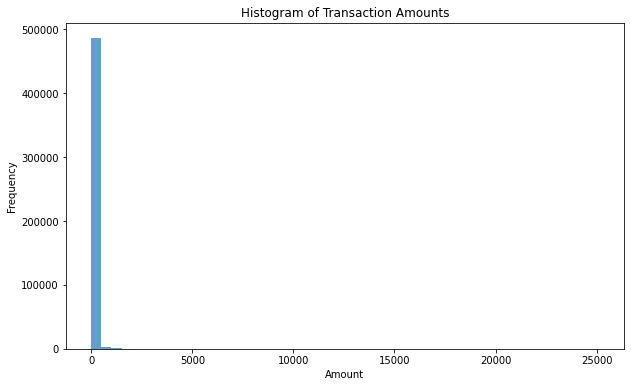

In [19]:
# 데이터 분포 확인
plt.figure(figsize=(10, 6))
plt.hist(fraud_drop['amt'], bins=50, alpha=0.7)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts')
plt.show()

데이터가 매우 치우쳐 있으므로 IQR 방법을 사용한다.

In [20]:
# IQR을 사용한 이상치 제거
Q1 = fraud_drop['amt'].quantile(0.25)
Q3 = fraud_drop['amt'].quantile(0.75)
IQR = Q3 - Q1

# 이상치가 아닌 데이터만 선택
fraud_df = fraud_drop[(fraud_drop['amt'] >= (Q1 - 1.5 * IQR)) & (fraud_drop['amt'] <= (Q3 + 1.5 * IQR))]

# 원본 데이터와 이상치 제거 후의 데이터 크기 비교
original_data_size = fraud_drop.shape[0]
removed_outliers_size = fraud_df.shape[0]

# 이상치의 비율 계산
outlier_percentage = (original_data_size - removed_outliers_size) / original_data_size * 100

# 결과 출력
print(f"Original Data Size: {original_data_size}")
print(f"Data after IQR Outlier Removal Size: {removed_outliers_size}")
print(f"Percentage of Outliers Removed: {outlier_percentage:.2f}%")

Original Data Size: 491134
Data after IQR Outlier Removal Size: 456334
Percentage of Outliers Removed: 7.09%


약 7%의 이상치가 제거되었다.

# Feature engineering

### 1. 신용카드 번호에 따른 거래 금액  
신용카드 번호에 따른 금액의 평균과 표준편차를 계산한 후, 특정 거래가 해당 카드의 일반적인 소비 패턴과 얼마나 벗어나는지 확인할 수 있다.  
표준편차가 큰 비정상적으로 높거나 낮은 금액의 거래는 사기 거래로 의심할 수 있다.

In [21]:
# 신용카드 번호 별 평균 거래 금액과 표준편차 계산
cc_stats = fraud_df.groupby('cc_num')['amt'].agg(['mean', 'std']).rename(columns={'mean': 'cc_avg', 'std': 'cc_std'})
cc_stats

,cc_avg,cc_std
cc_num,,
503874407318,41.477737,37.383034
567868110212,54.200865,47.503967
571365235126,43.025578,40.864425
581686439828,42.744337,38.584779
630423337322,41.014790,39.062944
...,...,...
4792627764422477317,53.204046,47.606379
4797297220948468262,40.772845,39.351545
4861310130652566408,53.699731,45.905570


In [22]:
# 신용카드 번호 별 평균 대비 거래 금액 차이 계산
fraud_df = fraud_df.merge(cc_stats, on='cc_num', how='left')
fraud_df['amt_dev'] = abs(fraud_df['amt'] - fraud_df['cc_avg']) / fraud_df['cc_std']
fraud_df[['cc_num', 'amt', 'cc_avg', 'cc_std', 'amt_dev']].head()

,cc_num,amt,cc_avg,cc_std,amt_dev
0,630423337322,107.23,41.014790,39.062944,1.695090
1,4956828990005111019,44.71,42.316915,38.123215,0.062772
2,180048185037117,46.28,54.429085,48.231896,0.168956
3,374930071163758,64.09,41.422934,37.870587,0.598540
4,2712209726293386,25.58,54.355035,47.681376,0.603486


In [23]:
fraud_df['amt_dev'].sort_values()

282793    0.000008
205307    0.000008
279205    0.000010
306164    0.000014
372274    0.000018
            ...   
106645    4.246548
309115    4.261286
421280    4.264431
126866    4.278725
374450    4.284554
Name: amt_dev, Length: 456334, dtype: float64

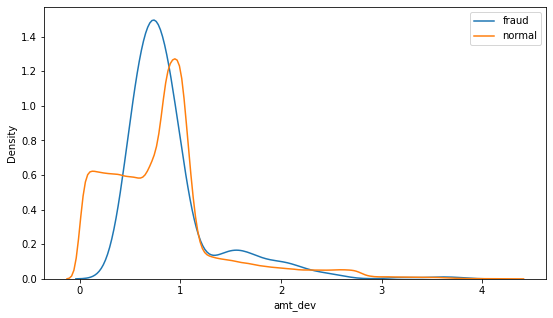

In [24]:
# 데이터 확인

fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(fraud_df[fraud_df['is_fraud'] == 1]['amt_dev'], ax = ax)
sns.kdeplot(fraud_df[fraud_df['is_fraud'] == 0]['amt_dev'], ax = ax)
plt.legend(['fraud', 'normal'])
plt.show()

정상 거래는 평균 거래 금액 대비 차이가 0 혹은 1일 때가 대부분이나, 사기거래의 경우 deviation이 0 ~1 사이에 넓게 분포한다.  
정상 거래에 비해서는 상대적으로 사기 거래일 때 amt_dev 1 ~2 (이상거래)의 범위가 더 큰 경향이 있다.

### 2. 거래가 발생한 시간대 확인  
이번에는 거래가 발생한 시간대를 피처로 만들어보자.  
24시간을 기준으로 아침: 6 ~12, 오후: 12 ~18, 저녁: 18 ~24, 새벽: 24 ~6로 설정한다.

In [25]:
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,cc_avg,cc_std,amt_dev
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,41.014790,39.062944,1.695090
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,7208,40.6747,-74.2239,124967,40.079588,-74.848087,0,42.316915,38.123215,0.062772
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,7060,40.6152,-74.4150,71485,40.021888,-74.228188,0,54.429085,48.231896,0.168956
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,48174,42.2203,-83.3583,31515,42.360426,-83.552316,0,41.422934,37.870587,0.598540
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,70808,30.4066,-91.1468,378909,29.737426,-90.853194,0,54.355035,47.681376,0.603486


In [26]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456334 entries, 0 to 456333
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  456334 non-null  object 
 1   cc_num                 456334 non-null  int64  
 2   merchant               456334 non-null  object 
 3   category               456334 non-null  object 
 4   amt                    456334 non-null  float64
 5   gender                 456334 non-null  object 
 6   city                   456334 non-null  object 
 7   state                  456334 non-null  object 
 8   zip                    456334 non-null  int64  
 9   lat                    456334 non-null  float64
 10  long                   456334 non-null  float64
 11  city_pop               456334 non-null  int64  
 12  merch_lat              456334 non-null  float64
 13  merch_long             456334 non-null  float64
 14  is_fraud               456334 non-nu

'trans_date_trans_time'의 데이터타입은 object이므로 datetime으로 변경하여 시간 데이터를 뽑아올 것이다.

In [27]:
# trans_date_trans_time을 datetime 객체로 변환
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456334 entries, 0 to 456333
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  456334 non-null  datetime64[ns]
 1   cc_num                 456334 non-null  int64         
 2   merchant               456334 non-null  object        
 3   category               456334 non-null  object        
 4   amt                    456334 non-null  float64       
 5   gender                 456334 non-null  object        
 6   city                   456334 non-null  object        
 7   state                  456334 non-null  object        
 8   zip                    456334 non-null  int64         
 9   lat                    456334 non-null  float64       
 10  long                   456334 non-null  float64       
 11  city_pop               456334 non-null  int64         
 12  merch_lat              456334 non-null  floa

데이터타입이 변경되었다.

In [28]:
# 시간대 분류 함수
def get_time(hour):
    if 6 <= hour < 12: # 아침
        return 'Morning'
    elif 12 <= hour < 18: # 오후
        return 'Afternoon'
    elif 18 <= hour < 24: # 저녁
        return 'Evening'
    else: # hour < 6 or hour == 24  # 밤 (새벽)
        return 'Night'

fraud_df['time_of_day'] = fraud_df['trans_date_trans_time'].dt.hour.apply(get_time)
fraud_df[['trans_date_trans_time', 'time_of_day']]

,trans_date_trans_time,time_of_day
0,2019-01-01 00:00:44,Night
1,2019-01-01 00:12:34,Night
2,2019-01-01 00:17:16,Night
3,2019-01-01 00:20:15,Night
4,2019-01-01 00:23:41,Night
...,...,...
456329,2020-12-31 23:56:48,Evening
456330,2020-12-31 23:56:57,Evening
456331,2020-12-31 23:59:09,Evening
456332,2020-12-31 23:59:15,Evening


In [29]:
fraud_df['time_of_day'].value_counts()

Afternoon    167332
Evening      166397
Morning       61397
Night         61208
Name: time_of_day, dtype: int64

대부분의 거래가 오후와 저녁에 일어난다.  

In [30]:
# 정상거래와 사기거래의 비율
fraud_df['is_fraud'].value_counts()

0    455940
1       394
Name: is_fraud, dtype: int64

In [31]:
round(394/455940 * 100, 2)

0.09

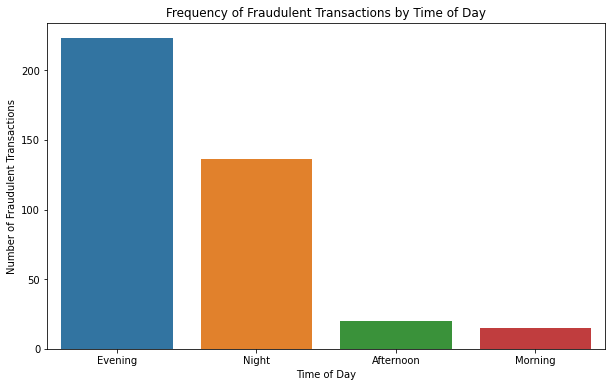

In [32]:
# 사기 거래만 필터링
fraud_only = fraud_df[fraud_df['is_fraud'] == 1]

# 사기 거래의 시간대별 빈도 계산 및 정렬
fraud_time_counts = fraud_only['time_of_day'].value_counts().sort_values(ascending=False)

# 사기 거래의 시간대별 빈도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_time_counts.index, y=fraud_time_counts.values)
plt.title('Frequency of Fraudulent Transactions by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

사기거래도 대부분 저녁, 밤 시간에 몰려있다.  
저녁 시간대에 가장 사기가 많이 발생하며, 아침 시간에 가장 사기 거래가 적게 발생한다.

### 거래 발생 위치 분석  
위도와 경도를 사용해 거래 발생 위치를 알 수 있다. 현재 데이터에서는 사용자의 거래 위도/경도(lat/long)와 상인의 거래 위도/경도(merch_lat, merch_long)가 나타나있으므로 이 두 발생 위치 사이의 거리를 계산할 수 있다.  
사용자의 거래 위치와 동떨어진 위치에서 거래가 발생하면 사기 거래로 의심할 수 있다.

#### Haversine 공식
위도와 경도를 사용한 최단 거리를 계산하기 위해서는 Haversine 공식을 사용해야 한다.

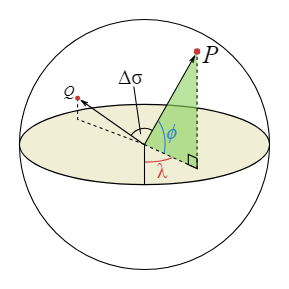

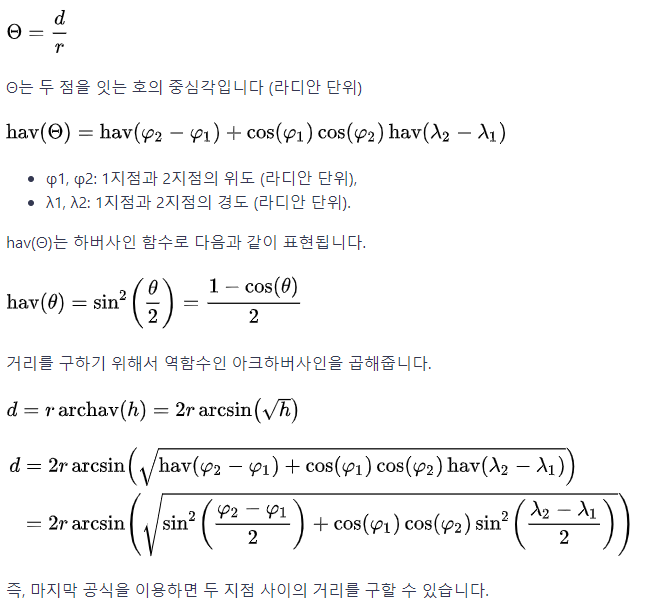
[출처](https://stricky.tistory.com/284)

즉, 지구를 구로 가정하고 좌표를 라디안으로 변경한 뒤 삼각함수를 사용해 계산하면 된다.

In [33]:
# 거리 계산 함수 (위도와 경도를 이용하여 거리 계산 - Haversine 공식)
def haversine(lat1, lon1, lat2, lon2):
    # 지구 반경 (킬로미터 단위)
    R = 6371.0

    # 좌표를 라디안으로 변환
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # 차이 계산
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine 공식
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # 거리 반환
    return R * c

# 거래 위치와 상인 위치 간 거리 계산
fraud_df['transaction_distance'] = fraud_df.apply(lambda x: haversine(x['lat'], x['long'], x['merch_lat'], x['merch_long']), axis=1)

In [34]:
pd.DataFrame(fraud_df['transaction_distance'])

,transaction_distance
0,30.212176
1,84.702120
2,67.847742
3,22.303906
4,79.591943
...,...
456329,98.027030
456330,127.382373
456331,100.074420
456332,80.759302


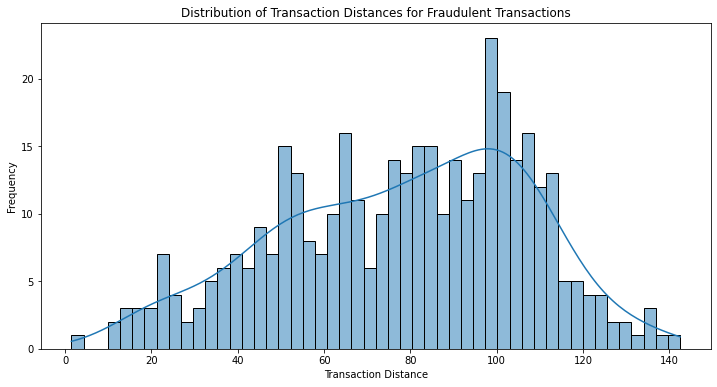

In [35]:
# 사기 거래인 경우만 거래 거리 시각화
fraudulent_transactions = fraud_df[fraud_df['is_fraud'] == 1]

plt.figure(figsize=(12, 6))
sns.histplot(data=fraudulent_transactions, x='transaction_distance', bins=50, kde=True)
plt.title('Distribution of Transaction Distances for Fraudulent Transactions')
plt.xlabel('Transaction Distance')
plt.ylabel('Frequency')
plt.show()

사기 거래일 때의 빈도가 가장 높은 거리는 100 근처이다. 너무 먼 거리에서는 오히려 사기 거래가 잘 발생하지 않는다.

# 원핫인코딩

In [36]:
fraud_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,cc_avg,cc_std,amt_dev,time_of_day,transaction_distance
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,41.014790,39.062944,1.695090,Night,30.212176
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,7208,40.6747,-74.2239,124967,40.079588,-74.848087,0,42.316915,38.123215,0.062772,Night,84.702120
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,7060,40.6152,-74.4150,71485,40.021888,-74.228188,0,54.429085,48.231896,0.168956,Night,67.847742
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,48174,42.2203,-83.3583,31515,42.360426,-83.552316,0,41.422934,37.870587,0.598540,Night,22.303906
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,70808,30.4066,-91.1468,378909,29.737426,-90.853194,0,54.355035,47.681376,0.603486,Night,79.591943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456329,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,Wilmington,NC,28405,34.2651,-77.8670,186140,34.853497,-78.664158,0,53.757919,46.751782,1.721904,Evening,98.027030
456330,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,SC,29819,34.0326,-82.2027,1523,35.008839,-81.475156,0,42.678260,40.435468,0.425079,Evening,127.382373
456331,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,29.661049,-96.186633,0,34.375430,36.372590,2.129751,Evening,100.074420
456332,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,3684,46.658340,-119.715054,0,55.022875,47.684144,0.668086,Evening,80.759302


In [37]:
# 데이터타입이 object인 컬럼 추출
fraud_df.columns[fraud_df.dtypes == 'object']

Index(['merchant', 'category', 'gender', 'city', 'state', 'time_of_day'], dtype='object')

In [40]:
print(fraud_df['merchant'].nunique())
print(fraud_df['category'].nunique())
print(fraud_df['gender'].nunique())
print(fraud_df['city'].nunique())
print(fraud_df['state'].nunique())
print(fraud_df['time_of_day'].nunique())

693
14
2
121
44
4


In [41]:
# 원핫인코딩
fraud_df = pd.get_dummies(fraud_df, columns=['category', 'gender', 'state', 'time_of_day'], drop_first=True)
fraud_df

,trans_date_trans_time,cc_num,merchant,amt,city,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,cc_avg,cc_std,amt_dev,transaction_distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,...,state_MT,state_NC,state_ND,state_NE,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_PA,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Orient,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,41.014790,39.062944,1.695090,30.212176,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",44.71,Elizabeth,7208,40.6747,-74.2239,124967,40.079588,-74.848087,0,42.316915,38.123215,0.062772,84.702120,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,46.28,Plainfield,7060,40.6152,-74.4150,71485,40.021888,-74.228188,0,54.429085,48.231896,0.168956,67.847742,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,64.09,Romulus,48174,42.2203,-83.3583,31515,42.360426,-83.552316,0,41.422934,37.870587,0.598540,22.303906,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,25.58,Baton Rouge,70808,30.4066,-91.1468,378909,29.737426,-90.853194,0,54.355035,47.681376,0.603486,79.591943,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456329,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,134.26,Wilmington,28405,34.2651,-77.8670,186140,34.853497,-78.664158,0,53.757919,46.751782,1.721904,98.027030,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
456330,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",25.49,Bradley,29819,34.0326,-82.2027,1523,35.008839,-81.475156,0,42.678260,40.435468,0.425079,127.382373,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
456331,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,111.84,Lake Jackson,77566,29.0393,-95.4401,28739,29.661049,-96.186633,0,34.375430,36.372590,2.129751,100.074420,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
456332,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,86.88,Burbank,99323,46.1966,-118.9017,3684,46.658340,-119.715054,0,55.022875,47.684144,0.668086,80.759302,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


# 회고
빠르게 복습하다보니 이상치를 처리하는 방법이 기억나서 오늘은 적용해 보았습니다.  
그동안은 이상치를 일일이 처리했는데 IQR로 처리하니 확실히 편한 것 같긴 합니다.  
그런데 이상치 데이터 처리하면서 사기 거래 내역이 너무 많이 날아가서 흠...좀 더 고민해봐야 할 것 같습니다.

데이터를 후가공해서 바꿀 생각은 그동안 못해본 것 같은데, 생각해보니 당연한 과정인 것 같아서 머리가 띵하네요ㅋㅋㅋ  
SQL에서도 일부는 그렇게 계산하는 것들이 나왔는데 기억못했네요...😂
정말 복습을 게을리하면 안될 것 같습니다.  
지난 주말은 계속 약속이 있어서 나갔다 오느라 복습을 제대로 못했는데 이런 업보로 돌아오네요ㅎㅎ...  
복습의 중요성을 다시 한 번 깨닫습니다.

아직 머신러닝 초입단계인데 이렇게 가공한 비정제 데이터의 퀄리티에 따라 머신러닝의 퀄리티도 (당연히) 달라지겠죠?  
여러 정보를 많이 찾아봐야겠습니다.  
그리고 요즘 그래프 그리기에 재미가 들렸는데 아직 어떤 그래프가 어떤 상황에서 적절한지 감이 안 와서 이것도 열심히 찾아봐야 할 것 같습니다.  
(사실 어제 찾아봤는데 바로 모두연 사이트 글이 나오더라구요ㅎㅎ)

아무튼...확실히 계속 코딩을 하다보니 뭔가 코딩 근육?이라는 것이 조금은 생기는 것 같습니다.  
계속 연습할 수 있는 기회가 있어 좋아요.